# Pipeline Throughput and Capacity

## 1. Objective: 

#### To explore Pipeline Throughput and Capacity data for pipelines licensed by National Energy Board. Data for natural gas is captured daily while data for oil is captured monthly.

### 1.1 Data Source:

#### https://open.canada.ca/data/en/dataset/dc343c43-a592-4a27-8ee7-c77df56afb34#wb-auto-6

#### Data is obtained under the open government licence canada.
#### https://open.canada.ca/en/open-government-licence-canada

## 2. ETL Process

### Combining several csv files with the same format and columns from one folder using a single python statement.

### Load Pipeline txt files from Pipeline folder - Group A




In [1]:
import glob

%matplotlib inline

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##### reference for Code below (https://medium.com/@kadek/elegantly-reading-multiple-csvs-into-pandas-e1a76843b688)
# glob.glob('data*.csv') - returns List[str]
# pd.read_csv(f) - returns pd.DataFrame()
# for f in glob.glob() - returns a List[DataFrames]
# pd.concat() - returns one pd.DataFrame()
df_GroupA = pd.concat([pd.read_csv(f, sep = ",", encoding="latin-1") for f in glob.glob(r"C:\Users\ijeke\Documents\Datasets\Pipeline throughput\Pipeline textfiles\Group A\*.txt")], ignore_index = True)

In [2]:
print(df_GroupA)

        Date  Month  Year                       Corporate Entity  \
0          1      1  2006  Alliance Pipeline Limited Partnership   
1          2      1  2006  Alliance Pipeline Limited Partnership   
2          3      1  2006  Alliance Pipeline Limited Partnership   
3          4      1  2006  Alliance Pipeline Limited Partnership   
4          5      1  2006  Alliance Pipeline Limited Partnership   
...      ...    ...   ...                                    ...   
162835    26      9  2019                  Westcoast Energy Inc.   
162836    27      9  2019                  Westcoast Energy Inc.   
162837    28      9  2019                  Westcoast Energy Inc.   
162838    29      9  2019                  Westcoast Energy Inc.   
162839    30      9  2019                  Westcoast Energy Inc.   

            Pipeline Name     Key Point  Latitude  Longitude  \
0       Alliance Pipeline        Border   49.0000   -101.588   
1       Alliance Pipeline        Border   49.0000   -10

In [3]:
## drop duplicate values

df_GroupA.drop_duplicates(inplace=True)
df_GroupA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162840 entries, 0 to 162839
Data columns (total 13 columns):
Date                      162840 non-null int64
Month                     162840 non-null int64
Year                      162840 non-null int64
Corporate Entity          162840 non-null object
Pipeline Name             162840 non-null object
Key Point                 162840 non-null object
Latitude                  162840 non-null float64
Longitude                 162840 non-null float64
Direction of Flow         162840 non-null object
Trade Type                162840 non-null object
Capacity (1000 m3/d)      162764 non-null float64
Throughput (1000 m3/d)    162636 non-null float64
Throughput (GJ/d)         162656 non-null float64
dtypes: float64(5), int64(3), object(5)
memory usage: 17.4+ MB


## Load Pipeline txt files from Pipeline folder - Group B

In [4]:
df_GroupB = pd.concat([pd.read_csv(f, sep = ",", encoding="latin-1") for f in glob.glob(r"C:\Users\ijeke\Documents\Datasets\Pipeline throughput\Pipeline textfiles\Group B\*.txt")], ignore_index = True)

In [5]:
print(df_GroupB)

      Month  Year                       Corporate Entity     Pipeline Name  \
0         7  2014                          Kinder Morgan            Cochin   
1         7  2014                          Kinder Morgan            Cochin   
2         7  2014                          Kinder Morgan            Cochin   
3         8  2014                          Kinder Morgan            Cochin   
4         8  2014                          Kinder Morgan            Cochin   
...     ...   ...                                    ...               ...   
2944      1  2019  TEML Westpur Pipelines Limited (TEML)  Westpur Pipeline   
2945      1  2019  TEML Westpur Pipelines Limited (TEML)  Westpur Pipeline   
2946      2  2019  TEML Westpur Pipelines Limited (TEML)  Westpur Pipeline   
2947      2  2019  TEML Westpur Pipelines Limited (TEML)  Westpur Pipeline   
2948      2  2019  TEML Westpur Pipelines Limited (TEML)  Westpur Pipeline   

             Key Point  Latitude  Longitude Direction of Flow  

In [6]:
## drop duplicate values
df_GroupB.drop_duplicates(inplace=True)

df_GroupB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2949 entries, 0 to 2948
Data columns (total 14 columns):
Month                             2949 non-null int64
Year                              2949 non-null int64
Corporate Entity                  2949 non-null object
Pipeline Name                     2949 non-null object
Key Point                         2949 non-null object
Latitude                          2674 non-null float64
Longitude                         2674 non-null float64
Direction of Flow                 2949 non-null object
Trade Type                        2949 non-null object
Product                           2949 non-null object
Throughput (1000 m3/d)            2949 non-null float64
Nameplate Capacity (1000 m3/d)    990 non-null float64
Available Capacity (1000 m3/d)    2582 non-null float64
Reason For Variance               2115 non-null object
dtypes: float64(5), int64(2), object(7)
memory usage: 345.6+ KB


In [7]:
df_GroupB.loc[(df_GroupB['Pipeline Name'] == 'Cochin')]

,Month,Year,Corporate Entity,Pipeline Name,Key Point,Latitude,Longitude,Direction of Flow,Trade Type,Product,Throughput (1000 m3/d),Nameplate Capacity (1000 m3/d),Available Capacity (1000 m3/d),Reason For Variance
0,7,2014,Kinder Morgan,Cochin,Ft. Saskatchewan,53.750,-113.170,west,import,condensate,0.532833,NaN,15.103792,The Canadian portion of the Cochin pipeline ha...
1,7,2014,Kinder Morgan,Cochin,Regina,50.466,-104.718,east,import,refined petroleum products,0.014601,NaN,NaN,NaN
2,7,2014,Kinder Morgan,Cochin,Windsor,42.280,-83.077,east,import,refined petroleum products,0.001369,NaN,12.083034,NaN
3,8,2014,Kinder Morgan,Cochin,Ft. Saskatchewan,53.750,-113.170,west,import,condensate,0.577185,NaN,15.103792,The Canadian portion of the Cochin pipeline ha...
4,8,2014,Kinder Morgan,Cochin,Windsor,42.280,-83.077,east,import,refined petroleum products,0.000000,NaN,12.083034,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,5,2019,Kinder Morgan,Cochin,Ft. Saskatchewan,53.750,-113.170,west,import,condensate,16.233936,NaN,15.103792,"As previously indicated, the Canadian portion ..."
102,6,2019,Kinder Morgan,Cochin,Ft. Saskatchewan,53.750,-113.170,west,import,condensate,13.510962,NaN,15.103792,"As previously indicated, the Canadian portion ..."
103,7,2019,Kinder Morgan,Cochin,Ft. Saskatchewan,53.750,-113.170,west,import,condensate,14.030644,NaN,15.103792,"As previously indicated, the Canadian portion ..."
104,8,2019,Kinder Morgan,Cochin,Ft. Saskatchewan,53.750,-113.170,west,import,condensate,15.997404,NaN,15.103792,"As previously indicated, the Canadian portion ..."


In [8]:
df_GroupA.rename(columns={'Capacity (1000 m3/d)': 'Available Capacity (1000 m3/d)'}, inplace = True)



## Rename and drop columns as required

In [9]:
df_GroupA.drop(columns={'Date', 'Throughput (GJ/d)'},inplace=True)

df_GroupB.drop(columns={'Reason For Variance', 'Nameplate Capacity (1000 m3/d)'},inplace=True)



In [10]:
df_GroupA.info()
df_GroupB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162840 entries, 0 to 162839
Data columns (total 11 columns):
Month                             162840 non-null int64
Year                              162840 non-null int64
Corporate Entity                  162840 non-null object
Pipeline Name                     162840 non-null object
Key Point                         162840 non-null object
Latitude                          162840 non-null float64
Longitude                         162840 non-null float64
Direction of Flow                 162840 non-null object
Trade Type                        162840 non-null object
Available Capacity (1000 m3/d)    162764 non-null float64
Throughput (1000 m3/d)            162636 non-null float64
dtypes: float64(4), int64(2), object(5)
memory usage: 14.9+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2949 entries, 0 to 2948
Data columns (total 12 columns):
Month                             2949 non-null int64
Year                              29

## Lookup missing info Product for Group A pipelines and add to the dataframe

In [11]:
### Based on data here - Group A pipelines are all natural gas (https://www.cer-rec.gc.ca/nrg/ntgrtd/pplnprtl/pplnprfls/index-eng.html)

### NGTL System pipeline 
### Canadian Mainline 
### Foothills system
### Alliance Pipeline
### BC Pipeline also known as Westcoast Transmission system
### Trans Quebec & Maritimes Pipeline

In [12]:
## add new column Product to GroupA dataframe with default Natural Gas

df_GroupA['Product']= 'natural gas'
df_GroupA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162840 entries, 0 to 162839
Data columns (total 12 columns):
Month                             162840 non-null int64
Year                              162840 non-null int64
Corporate Entity                  162840 non-null object
Pipeline Name                     162840 non-null object
Key Point                         162840 non-null object
Latitude                          162840 non-null float64
Longitude                         162840 non-null float64
Direction of Flow                 162840 non-null object
Trade Type                        162840 non-null object
Available Capacity (1000 m3/d)    162764 non-null float64
Throughput (1000 m3/d)            162636 non-null float64
Product                           162840 non-null object
dtypes: float64(4), int64(2), object(6)
memory usage: 16.2+ MB


## Combine Group A and Group B dataframes

In [13]:
## dont resort values, dont keep original index
frames = [df_GroupA, df_GroupB]

df_Pipelines=pd.concat(frames, sort=False, ignore_index=True)

In [14]:
df_Pipelines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165789 entries, 0 to 165788
Data columns (total 12 columns):
Month                             165789 non-null int64
Year                              165789 non-null int64
Corporate Entity                  165789 non-null object
Pipeline Name                     165789 non-null object
Key Point                         165789 non-null object
Latitude                          165514 non-null float64
Longitude                         165514 non-null float64
Direction of Flow                 165789 non-null object
Trade Type                        165789 non-null object
Available Capacity (1000 m3/d)    165346 non-null float64
Throughput (1000 m3/d)            165585 non-null float64
Product                           165789 non-null object
dtypes: float64(4), int64(2), object(6)
memory usage: 15.2+ MB


## Create dataframes for dimension tables

In [15]:
df_PipelineCoInfo = df_Pipelines[['Pipeline Name', 'Corporate Entity']].drop_duplicates(inplace=False)

 ## set index from 1 to 16
    
y = pd.Series(range(1,16))
df_PipelineCoInfo.set_index([y],inplace=True)

print(df_PipelineCoInfo)

                        Pipeline Name                       Corporate Entity
1                   Alliance Pipeline  Alliance Pipeline Limited Partnership
2                    Foothills System  Foothills Pipe Lines Ltd. (Foothills)
3                   Canadian Mainline         Maritimes & Northeast Pipeline
4                         NGTL System      NOVA Gas Transmission Ltd. (NGTL)
5                   Canadian Mainline          TransCanada PipeLines Limited
6   Trans Québec & Maritimes Pipeline  Trans Québec & Maritimes Pipeline Inc
7                         BC Pipeline                  Westcoast Energy Inc.
8                              Cochin                          Kinder Morgan
9                   Canadian Mainline                Enbridge Pipelines Inc.
10           Keystone Pipeline System  TransCanada Keystone Pipeline GP Ltd.
11              Norman Wells Pipeline           Enbridge Pipelines (NW) Inc.
12           Southern Lights Pipeline       Enbridge Southern Lights GP Inc.

In [16]:
df_PipelineName = df_Pipelines[['Pipeline Name']].drop_duplicates(inplace=False)
df_CorporateEntity = df_Pipelines[['Corporate Entity']].drop_duplicates(inplace=False)

df_CorporateEntity.reset_index(drop=True,inplace=True)
df_PipelineName.reset_index(drop=True,inplace=True)

print(df_PipelineName)


                        Pipeline Name
0                   Alliance Pipeline
1                    Foothills System
2                   Canadian Mainline
3                         NGTL System
4   Trans Québec & Maritimes Pipeline
5                         BC Pipeline
6                              Cochin
7            Keystone Pipeline System
8               Norman Wells Pipeline
9            Southern Lights Pipeline
10            Trans Mountain Pipeline
11                     Trans-Northern
12                   Westpur Pipeline


In [17]:
print(df_CorporateEntity)


                         Corporate Entity
0   Alliance Pipeline Limited Partnership
1   Foothills Pipe Lines Ltd. (Foothills)
2          Maritimes & Northeast Pipeline
3       NOVA Gas Transmission Ltd. (NGTL)
4           TransCanada PipeLines Limited
5   Trans Québec & Maritimes Pipeline Inc
6                   Westcoast Energy Inc.
7                           Kinder Morgan
8                 Enbridge Pipelines Inc.
9   TransCanada Keystone Pipeline GP Ltd.
10           Enbridge Pipelines (NW) Inc.
11       Enbridge Southern Lights GP Inc.
12            Trans Mountain Pipeline ULC
13          Trans-Northern Pipelines Inc.
14  TEML Westpur Pipelines Limited (TEML)


In [18]:
## df_TradeType.drop_duplicates

df_Product = df_Pipelines[['Product']].drop_duplicates(inplace=False)

df_Product.index = np.arange(1,len(df_Product)+1)

print(df_Product)
df_Pipelines.info()

                        Product
1                   natural gas
2                    condensate
3    refined petroleum products
4                 foreign light
5                domestic heavy
6          domestic light / ngl
7                domestic light
8                       diluent
9     natural gas liquids (ngl)
10  south east sask (ses) crude
11  westspur midale (msm) crude
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165789 entries, 0 to 165788
Data columns (total 12 columns):
Month                             165789 non-null int64
Year                              165789 non-null int64
Corporate Entity                  165789 non-null object
Pipeline Name                     165789 non-null object
Key Point                         165789 non-null object
Latitude                          165514 non-null float64
Longitude                         165514 non-null float64
Direction of Flow                 165789 non-null object
Trade Type                        165789 non-null

In [19]:
df_TradeType = df_Pipelines[['Trade Type']].drop_duplicates(inplace=False)
 
    ## set index as number of rows starting from 1
df_TradeType.index = np.arange(1,len(df_TradeType)+1)

print(df_TradeType)

             Trade Type
1                export
2           intracanada
3                import
4                     `
5  intracanada / export


## Clean data where required

In [20]:
## look up data that has error identified
df_Pipelines.loc[(df_Pipelines['Trade Type'] == '`')]


,Month,Year,Corporate Entity,Pipeline Name,Key Point,Latitude,Longitude,Direction of Flow,Trade Type,Available Capacity (1000 m3/d),Throughput (1000 m3/d),Product
158097,11,2017,Westcoast Energy Inc.,BC Pipeline,NOVA/Gordondale,55.8643,-119.568,west,`,7854.0,0.0,natural gas


In [21]:
## look up values closest to it
df_Pipelines.iloc[158095:158099]

,Month,Year,Corporate Entity,Pipeline Name,Key Point,Latitude,Longitude,Direction of Flow,Trade Type,Available Capacity (1000 m3/d),Throughput (1000 m3/d),Product
158095,11,2017,Westcoast Energy Inc.,BC Pipeline,NOVA/Gordondale,55.8643,-119.568,east,intracanada,10901.0,5416.8,natural gas
158096,11,2017,Westcoast Energy Inc.,BC Pipeline,NOVA/Gordondale,55.8643,-119.568,east,intracanada,10901.0,4205.1,natural gas
158097,11,2017,Westcoast Energy Inc.,BC Pipeline,NOVA/Gordondale,55.8643,-119.568,west,`,7854.0,0.0,natural gas
158098,11,2017,Westcoast Energy Inc.,BC Pipeline,NOVA/Gordondale,55.8643,-119.568,west,intracanada,7854.0,0.0,natural gas


In [22]:
## based on data above, replace Error value with intracanada

df_Pipelines.replace(to_replace = "`" , value="intracanada", inplace=True)

## check dataframe again

df_Pipelines.iloc[158095:158099]


,Month,Year,Corporate Entity,Pipeline Name,Key Point,Latitude,Longitude,Direction of Flow,Trade Type,Available Capacity (1000 m3/d),Throughput (1000 m3/d),Product
158095,11,2017,Westcoast Energy Inc.,BC Pipeline,NOVA/Gordondale,55.8643,-119.568,east,intracanada,10901.0,5416.8,natural gas
158096,11,2017,Westcoast Energy Inc.,BC Pipeline,NOVA/Gordondale,55.8643,-119.568,east,intracanada,10901.0,4205.1,natural gas
158097,11,2017,Westcoast Energy Inc.,BC Pipeline,NOVA/Gordondale,55.8643,-119.568,west,intracanada,7854.0,0.0,natural gas
158098,11,2017,Westcoast Energy Inc.,BC Pipeline,NOVA/Gordondale,55.8643,-119.568,west,intracanada,7854.0,0.0,natural gas


In [23]:
## rerun this dataframe to get rid of the error `
df_TradeType = df_Pipelines[['Trade Type']].drop_duplicates(inplace=False)
 
    ## set index as number of rows starting from 1
df_TradeType.index = np.arange(1,len(df_TradeType)+1)

print(df_TradeType)

             Trade Type
1                export
2           intracanada
3                import
4  intracanada / export


In [24]:
## rename Month column as MonthSort
df_Pipelines.rename(columns={'Month':'MonthSort'}, inplace=True)

In [25]:
## Create a new month dataframe table

st = pd.Series(range(1,13)) ## month numbers

data = {'MonthSort': st, 'Month':['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']}
Month_df = pd.DataFrame(data)

print(Month_df)
Month_df.info()


    MonthSort      Month
0           1    January
1           2   February
2           3      March
3           4      April
4           5        May
5           6       June
6           7       July
7           8     August
8           9  September
9          10    October
10         11   November
11         12   December
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
MonthSort    12 non-null int64
Month        12 non-null object
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


In [26]:
df_Pipelines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165789 entries, 0 to 165788
Data columns (total 12 columns):
MonthSort                         165789 non-null int64
Year                              165789 non-null int64
Corporate Entity                  165789 non-null object
Pipeline Name                     165789 non-null object
Key Point                         165789 non-null object
Latitude                          165514 non-null float64
Longitude                         165514 non-null float64
Direction of Flow                 165789 non-null object
Trade Type                        165789 non-null object
Available Capacity (1000 m3/d)    165346 non-null float64
Throughput (1000 m3/d)            165585 non-null float64
Product                           165789 non-null object
dtypes: float64(4), int64(2), object(6)
memory usage: 15.2+ MB


In [27]:
## combine month info to pipeline info
left = Month_df
right = df_Pipelines

PipelinesThroughputCapacity_df = pd.merge(left,right, how='right', on= 'MonthSort', sort=False, left_index = False, right_index=True, validate= "1:m")

print(PipelinesThroughputCapacity_df)

    MonthSort     Month  Year                       Corporate Entity  \
0           1   January  2006  Alliance Pipeline Limited Partnership   
0           1   January  2006  Alliance Pipeline Limited Partnership   
0           1   January  2006  Alliance Pipeline Limited Partnership   
0           1   January  2006  Alliance Pipeline Limited Partnership   
0           1   January  2006  Alliance Pipeline Limited Partnership   
..        ...       ...   ...                                    ...   
11         12  December  2017  TEML Westpur Pipelines Limited (TEML)   
11         12  December  2017  TEML Westpur Pipelines Limited (TEML)   
11         12  December  2018  TEML Westpur Pipelines Limited (TEML)   
11         12  December  2018  TEML Westpur Pipelines Limited (TEML)   
11         12  December  2018  TEML Westpur Pipelines Limited (TEML)   

        Pipeline Name Key Point  Latitude  Longitude Direction of Flow  \
0   Alliance Pipeline    Border      49.0   -101.588         

In [28]:
## add month year, monthyearsort columns and reset index

PipelinesThroughputCapacity_df['MonthYear'] = PipelinesThroughputCapacity_df['Month'].map(str) + " " + PipelinesThroughputCapacity_df['Year'].map(str)

## change format of monthsort to two digits
PipelinesThroughputCapacity_df['MonthYearSort'] = PipelinesThroughputCapacity_df['Year'].map(str) + PipelinesThroughputCapacity_df['MonthSort'].map(str).str.zfill(2)


PipelinesThroughputCapacity_df.reset_index (inplace=True)

PipelinesThroughputCapacity_df.head()




,index,MonthSort,Month,Year,Corporate Entity,Pipeline Name,Key Point,Latitude,Longitude,Direction of Flow,Trade Type,Available Capacity (1000 m3/d),Throughput (1000 m3/d),Product,MonthYear,MonthYearSort
0,0,1,January,2006,Alliance Pipeline Limited Partnership,Alliance Pipeline,Border,49.0,-101.588,southeast,export,51717.212324,48884.199219,natural gas,January 2006,200601
1,0,1,January,2006,Alliance Pipeline Limited Partnership,Alliance Pipeline,Border,49.0,-101.588,southeast,export,51733.310913,48708.101562,natural gas,January 2006,200601
2,0,1,January,2006,Alliance Pipeline Limited Partnership,Alliance Pipeline,Border,49.0,-101.588,southeast,export,51748.750890,48355.300781,natural gas,January 2006,200601
3,0,1,January,2006,Alliance Pipeline Limited Partnership,Alliance Pipeline,Border,49.0,-101.588,southeast,export,51763.527545,49248.500000,natural gas,January 2006,200601
4,0,1,January,2006,Alliance Pipeline Limited Partnership,Alliance Pipeline,Border,49.0,-101.588,southeast,export,51777.636370,49377.800781,natural gas,January 2006,200601


In [29]:
print(PipelinesThroughputCapacity_df)

        index  MonthSort     Month  Year  \
0           0          1   January  2006   
1           0          1   January  2006   
2           0          1   January  2006   
3           0          1   January  2006   
4           0          1   January  2006   
...       ...        ...       ...   ...   
165784     11         12  December  2017   
165785     11         12  December  2017   
165786     11         12  December  2018   
165787     11         12  December  2018   
165788     11         12  December  2018   

                             Corporate Entity      Pipeline Name Key Point  \
0       Alliance Pipeline Limited Partnership  Alliance Pipeline    Border   
1       Alliance Pipeline Limited Partnership  Alliance Pipeline    Border   
2       Alliance Pipeline Limited Partnership  Alliance Pipeline    Border   
3       Alliance Pipeline Limited Partnership  Alliance Pipeline    Border   
4       Alliance Pipeline Limited Partnership  Alliance Pipeline    Border   
...

## Groupby data for creating Throughput/Capacity chart

In [30]:
##PipelinesThroughputCapacity_df[''] group by PIpelineName, Max Available Capacity value

import numpy as np

PipelineCapacity_df = PipelinesThroughputCapacity_df.groupby('Pipeline Name').agg({'Available Capacity (1000 m3/d)': np.max, 'Throughput (1000 m3/d)': np.max})

print(PipelineCapacity_df)

                                   Available Capacity (1000 m3/d)  \
Pipeline Name                                                       
Alliance Pipeline                                    52385.388303   
BC Pipeline                                          48214.000000   
Canadian Mainline                                   209646.227900   
Cochin                                                  15.103792   
Foothills System                                     85000.000000   
Keystone Pipeline System                                96.650000   
NGTL System                                         302165.000000   
Norman Wells Pipeline                                    2.600000   
Southern Lights Pipeline                                36.100000   
Trans Mountain Pipeline                                 55.000000   
Trans Québec & Maritimes Pipeline                    24384.000000   
Trans-Northern                                                NaN   
Westpur Pipeline                  

In [31]:
## reset index to return Pipeline name as a column
PipelineCapacity_df.reset_index(level=0, inplace=True)
PipelineCapacity_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
Pipeline Name                     13 non-null object
Available Capacity (1000 m3/d)    12 non-null float64
Throughput (1000 m3/d)            13 non-null float64
dtypes: float64(2), object(1)
memory usage: 440.0+ bytes


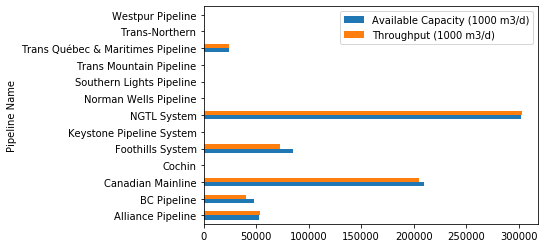

In [32]:
## basic plot

ax = PipelineCapacity_df.plot.barh(x='Pipeline Name', rot=0)

## Low capacity pipeline charts

In [33]:
## low capacity pipelines not showing on charts, keep columns only where rate is less than 1000

dropcodes = PipelineCapacity_df[(PipelineCapacity_df['Available Capacity (1000 m3/d)']> 1000) | (PipelineCapacity_df['Throughput (1000 m3/d)']> 1000)].index
PipelineLowCapacity_df = PipelineCapacity_df.drop(dropcodes, inplace=False)

print(PipelineLowCapacity_df)

               Pipeline Name  Available Capacity (1000 m3/d)  \
3                     Cochin                       15.103792   
5   Keystone Pipeline System                       96.650000   
7      Norman Wells Pipeline                        2.600000   
8   Southern Lights Pipeline                       36.100000   
9    Trans Mountain Pipeline                       55.000000   
11            Trans-Northern                             NaN   
12          Westpur Pipeline                       39.333524   

    Throughput (1000 m3/d)  
3                88.237945  
5                95.590000  
7                 3.693615  
8                25.825879  
9                35.900000  
11               38.833333  
12               23.305076  


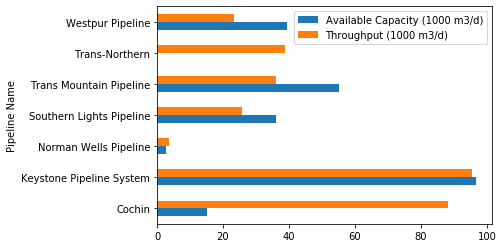

In [34]:
## basic plot

ax = PipelineLowCapacity_df.plot.barh(x='Pipeline Name', rot=0)



## Outlier with Cochin discovered

In [35]:
##outlier with Cochin discovered, rerun PipelineThroughput capacity dataframe and draw plot with only cochin data

cochin = PipelinesThroughputCapacity_df.loc[(PipelinesThroughputCapacity_df['Pipeline Name'] == 'Cochin')]

print(cochin)

        index  MonthSort     Month  Year Corporate Entity Pipeline Name  \
14043       0          1   January  2015    Kinder Morgan        Cochin   
14044       0          1   January  2015    Kinder Morgan        Cochin   
14045       0          1   January  2016    Kinder Morgan        Cochin   
14046       0          1   January  2016    Kinder Morgan        Cochin   
14047       0          1   January  2017    Kinder Morgan        Cochin   
...       ...        ...       ...   ...              ...           ...   
165557     11         12  December  2016    Kinder Morgan        Cochin   
165558     11         12  December  2016    Kinder Morgan        Cochin   
165559     11         12  December  2017    Kinder Morgan        Cochin   
165560     11         12  December  2017    Kinder Morgan        Cochin   
165561     11         12  December  2018    Kinder Morgan        Cochin   

               Key Point  Latitude  Longitude Direction of Flow Trade Type  \
14043   Ft. Saskatche

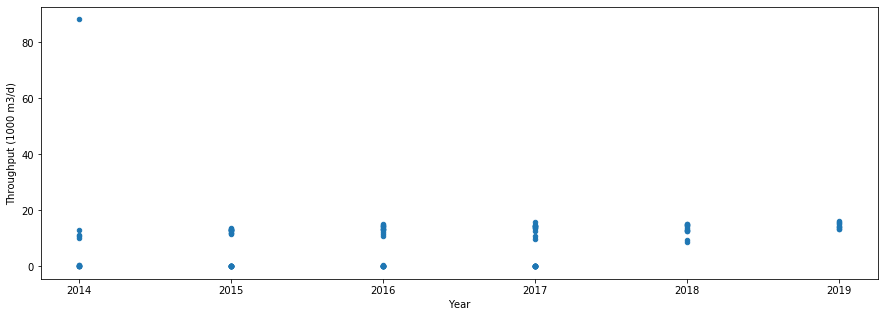

In [36]:
## scatter plot to confirm outlier

plot = cochin.plot(kind='scatter', x= 'Year', y= 'Throughput (1000 m3/d)', figsize=(15,5))

In [37]:
## look up year where outlier is found

cochin.loc[(cochin['Year'] == 2014)]

,index,MonthSort,Month,Year,Corporate Entity,Pipeline Name,Key Point,Latitude,Longitude,Direction of Flow,Trade Type,Available Capacity (1000 m3/d),Throughput (1000 m3/d),Product,MonthYear,MonthYearSort
97662,6,7,July,2014,Kinder Morgan,Cochin,Ft. Saskatchewan,53.750,-113.170,west,import,15.103792,0.532833,condensate,July 2014,201407
97663,6,7,July,2014,Kinder Morgan,Cochin,Regina,50.466,-104.718,east,import,NaN,0.014601,refined petroleum products,July 2014,201407
97664,6,7,July,2014,Kinder Morgan,Cochin,Windsor,42.280,-83.077,east,import,12.083034,0.001369,refined petroleum products,July 2014,201407
111986,7,8,August,2014,Kinder Morgan,Cochin,Ft. Saskatchewan,53.750,-113.170,west,import,15.103792,0.577185,condensate,August 2014,201408
111987,7,8,August,2014,Kinder Morgan,Cochin,Windsor,42.280,-83.077,east,import,12.083034,0.000000,refined petroleum products,August 2014,201408
125856,8,9,September,2014,Kinder Morgan,Cochin,Ft. Saskatchewan,53.750,-113.170,west,import,15.103792,10.899464,condensate,September 2014,201409
125857,8,9,September,2014,Kinder Morgan,Cochin,Windsor,42.280,-83.077,east,import,12.083034,0.000000,refined petroleum products,September 2014,201409
139226,9,10,October,2014,Kinder Morgan,Cochin,Ft. Saskatchewan,53.750,-113.170,west,import,15.103792,11.332096,condensate,October 2014,201410
139227,9,10,October,2014,Kinder Morgan,Cochin,Windsor,42.280,-83.077,east,import,12.083034,0.000000,refined petroleum products,October 2014,201410
152149,10,11,November,2014,Kinder Morgan,Cochin,Ft. Saskatchewan,53.750,-113.170,west,import,15.103792,10.217949,condensate,November 2014,201411


# ERROR FIX

In [38]:
## find index to drop
PipelinesThroughputCapacity_df.loc[(PipelinesThroughputCapacity_df['Pipeline Name'] == 'Cochin') & (PipelinesThroughputCapacity_df['Throughput (1000 m3/d)'] > 80) ].index


Int64Index([165554], dtype='int64')

In [39]:
## remove data where throughput for cochin is greater than value of 80 * 1000m3/d

PipelineThroughputCapacity_df = PipelinesThroughputCapacity_df.drop([165554], inplace=True) ## check to make sure line 38 reads the same index inputted

PipelinesThroughputCapacity_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165788 entries, 0 to 165788
Data columns (total 16 columns):
index                             165788 non-null int64
MonthSort                         165788 non-null int64
Month                             165788 non-null object
Year                              165788 non-null int64
Corporate Entity                  165788 non-null object
Pipeline Name                     165788 non-null object
Key Point                         165788 non-null object
Latitude                          165513 non-null float64
Longitude                         165513 non-null float64
Direction of Flow                 165788 non-null object
Trade Type                        165788 non-null object
Available Capacity (1000 m3/d)    165345 non-null float64
Throughput (1000 m3/d)            165584 non-null float64
Product                           165788 non-null object
MonthYear                         165788 non-null object
MonthYearSort                    

In [40]:
print(PipelinesThroughputCapacity_df)

        index  MonthSort     Month  Year  \
0           0          1   January  2006   
1           0          1   January  2006   
2           0          1   January  2006   
3           0          1   January  2006   
4           0          1   January  2006   
...       ...        ...       ...   ...   
165784     11         12  December  2017   
165785     11         12  December  2017   
165786     11         12  December  2018   
165787     11         12  December  2018   
165788     11         12  December  2018   

                             Corporate Entity      Pipeline Name Key Point  \
0       Alliance Pipeline Limited Partnership  Alliance Pipeline    Border   
1       Alliance Pipeline Limited Partnership  Alliance Pipeline    Border   
2       Alliance Pipeline Limited Partnership  Alliance Pipeline    Border   
3       Alliance Pipeline Limited Partnership  Alliance Pipeline    Border   
4       Alliance Pipeline Limited Partnership  Alliance Pipeline    Border   
...

In [41]:
## look up to check index dropped
PipelinesThroughputCapacity_df.loc[(PipelinesThroughputCapacity_df['Pipeline Name'] == 'Cochin') & (PipelinesThroughputCapacity_df['Throughput (1000 m3/d)'] > 80) ]



,index,MonthSort,Month,Year,Corporate Entity,Pipeline Name,Key Point,Latitude,Longitude,Direction of Flow,Trade Type,Available Capacity (1000 m3/d),Throughput (1000 m3/d),Product,MonthYear,MonthYearSort


## Revise PipelineCapacity group by data

In [42]:
## rerun Group by data 
import numpy as np

PipelineCapacityR_df = PipelinesThroughputCapacity_df.groupby('Pipeline Name').agg({'Available Capacity (1000 m3/d)': np.max, 'Throughput (1000 m3/d)': np.max})

## reset index to return Pipeline name as a column
PipelineCapacityR_df.reset_index(level=0, inplace=True)
PipelineCapacityR_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
Pipeline Name                     13 non-null object
Available Capacity (1000 m3/d)    12 non-null float64
Throughput (1000 m3/d)            13 non-null float64
dtypes: float64(2), object(1)
memory usage: 440.0+ bytes


## Revise PipelineLowCapacity data

In [43]:
## keep columns only where rate is less than 1000 for low capacity pipeline

dropcodes = PipelineCapacityR_df[(PipelineCapacityR_df['Available Capacity (1000 m3/d)']> 1000) | (PipelineCapacityR_df['Throughput (1000 m3/d)']> 1000)].index
PipelineLowCapacity_df = PipelineCapacityR_df.drop(dropcodes, inplace=False)

print(PipelineLowCapacity_df)

               Pipeline Name  Available Capacity (1000 m3/d)  \
3                     Cochin                       15.103792   
5   Keystone Pipeline System                       96.650000   
7      Norman Wells Pipeline                        2.600000   
8   Southern Lights Pipeline                       36.100000   
9    Trans Mountain Pipeline                       55.000000   
11            Trans-Northern                             NaN   
12          Westpur Pipeline                       39.333524   

    Throughput (1000 m3/d)  
3                16.233936  
5                95.590000  
7                 3.693615  
8                25.825879  
9                35.900000  
11               38.833333  
12               23.305076  


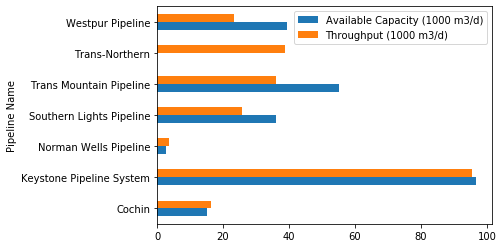

In [44]:
## basic plot
ax = PipelineLowCapacity_df.plot.barh(x='Pipeline Name', rot=0)



## High capacity pipeline charts


In [45]:
## keep columns only where rate is greater than or equal to 1000

dropcodes = PipelineCapacityR_df[(PipelineCapacityR_df['Available Capacity (1000 m3/d)']<= 1000) | (PipelineCapacityR_df['Throughput (1000 m3/d)']<= 1000)].index
PipelineHighCapacity_df = PipelineCapacityR_df.drop(dropcodes, inplace=False)

print(PipelineHighCapacity_df)

                        Pipeline Name  Available Capacity (1000 m3/d)  \
0                   Alliance Pipeline                    52385.388303   
1                         BC Pipeline                    48214.000000   
2                   Canadian Mainline                   209646.227900   
4                    Foothills System                    85000.000000   
6                         NGTL System                   302165.000000   
10  Trans Québec & Maritimes Pipeline                    24384.000000   

    Throughput (1000 m3/d)  
0             53570.601562  
1             40240.390000  
2            205384.545100  
4             72391.400000  
6            303616.681176  
10            23992.200000  


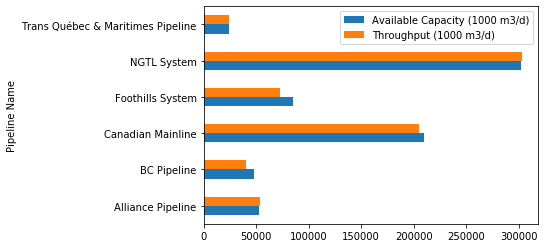

In [46]:
## basic plot

ax = PipelineHighCapacity_df.plot.barh(x='Pipeline Name', rot=0)

## Groupby data by product type 

In [47]:
##PipelinesThroughputCapacity_df[''] group by ProductType, Max Available Capacity value

import numpy as np

PipelineCapacityPT_df = PipelinesThroughputCapacity_df.groupby('Product').agg({'Available Capacity (1000 m3/d)': np.max, 'Throughput (1000 m3/d)': np.max})

print(PipelineCapacityPT_df)

                             Available Capacity (1000 m3/d)  \
Product                                                       
condensate                                        15.103792   
diluent                                           36.100000   
domestic heavy                                   460.905000   
domestic light                                    96.650000   
domestic light / ngl                             460.905000   
foreign light                                    460.905000   
natural gas                                   302165.000000   
natural gas liquids (ngl)                         39.333524   
refined petroleum products                        55.000000   
south east sask (ses) crude                       39.333524   
westspur midale (msm) crude                       39.333524   

                             Throughput (1000 m3/d)  
Product                                              
condensate                                16.233936  
diluent           

In [48]:
PipelineCapacityPT_df.reset_index(level=0, inplace=True)
PipelineCapacityPT_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
Product                           11 non-null object
Available Capacity (1000 m3/d)    11 non-null float64
Throughput (1000 m3/d)            11 non-null float64
dtypes: float64(2), object(1)
memory usage: 392.0+ bytes


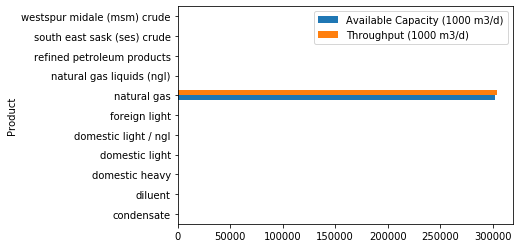

In [49]:
## basic plot

ax = PipelineCapacityPT_df.plot.barh(x='Product', rot=0)

## Groupby data by Trade type

In [50]:
##PipelinesThroughputCapacity_df[''] group by TradeType, Max Available Capacity value

import numpy as np

PipelineCapacityTT_df = PipelinesThroughputCapacity_df.groupby('Trade Type').agg({'Available Capacity (1000 m3/d)': np.max, 'Throughput (1000 m3/d)': np.max})

print(PipelineCapacityTT_df)

                      Available Capacity (1000 m3/d)  Throughput (1000 m3/d)
Trade Type                                                                  
export                                     85000.000            72391.400000
import                                     61000.000            55869.460000
intracanada                               302165.000           303616.681176
intracanada / export                         460.905              283.000000


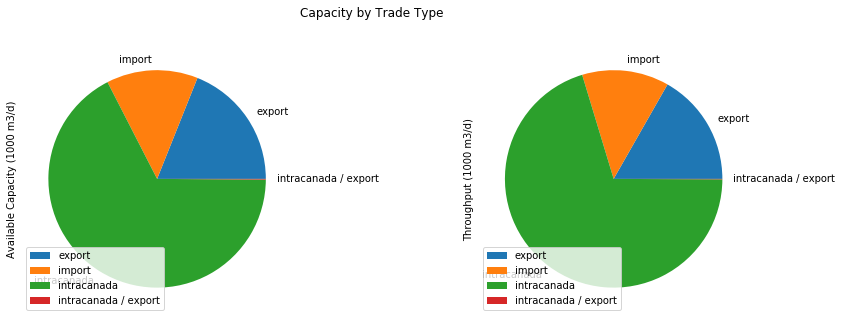

In [51]:
## create basic pie chart

plot = PipelineCapacityTT_df.plot(kind='pie',subplots=True, figsize=(15,5), title='Capacity by Trade Type')

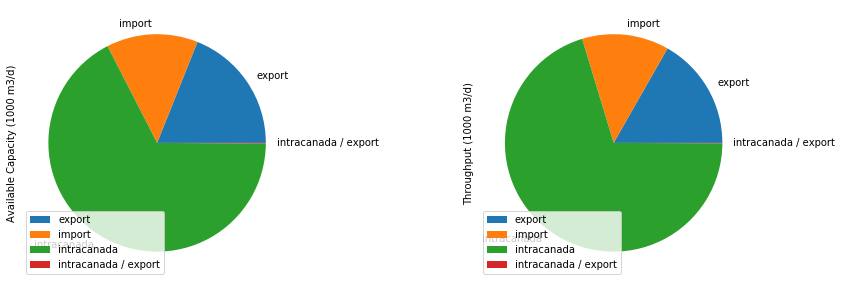

In [52]:
## show pipeline capacity by trade type as a piechart

plot = PipelineCapacityTT_df.plot.pie(subplots=True, figsize=(15,5))

In [53]:
## Change trade type index to column
PipelineCapacityTT_df.reset_index(level=0, inplace=True)
PipelineCapacityTT_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
Trade Type                        4 non-null object
Available Capacity (1000 m3/d)    4 non-null float64
Throughput (1000 m3/d)            4 non-null float64
dtypes: float64(2), object(1)
memory usage: 224.0+ bytes


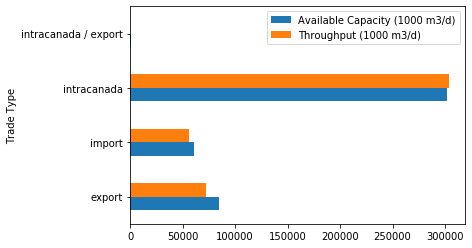

In [54]:
## basic bar chart

ax = PipelineCapacityTT_df.plot.barh(x='Trade Type', rot=0)

In [55]:
##PipelinesThroughputCapacity_df[''] group by ProductType and Corporate Entity, Max Available Capacity value

import numpy as np

PipelineCapacityPTCE_df = PipelinesThroughputCapacity_df.groupby(['Product', 'Corporate Entity']).agg({'Available Capacity (1000 m3/d)': np.max, 'Throughput (1000 m3/d)': np.max})

print(PipelineCapacityPTCE_df)

                                                                   Available Capacity (1000 m3/d)  \
Product                     Corporate Entity                                                        
condensate                  Kinder Morgan                                               15.103792   
diluent                     Enbridge Southern Lights GP Inc.                            36.100000   
domestic heavy              Enbridge Pipelines Inc.                                    460.905000   
                            Trans Mountain Pipeline ULC                                 55.000000   
                            TransCanada Keystone Pipeline GP Ltd.                       96.650000   
domestic light              Enbridge Pipelines (NW) Inc.                                 2.600000   
                            Trans Mountain Pipeline ULC                                 55.000000   
                            TransCanada Keystone Pipeline GP Ltd.                       96.

## Draw a histogram for the data

In [56]:
Alliance = PipelinesThroughputCapacity_df.loc[(PipelinesThroughputCapacity_df['Pipeline Name'] == 'Alliance Pipeline')]

print(Alliance)

        index  MonthSort     Month  Year  \
0           0          1   January  2006   
1           0          1   January  2006   
2           0          1   January  2006   
3           0          1   January  2006   
4           0          1   January  2006   
...       ...        ...       ...   ...   
153179     11         12  December  2018   
153180     11         12  December  2018   
153181     11         12  December  2018   
153182     11         12  December  2018   
153183     11         12  December  2018   

                             Corporate Entity      Pipeline Name Key Point  \
0       Alliance Pipeline Limited Partnership  Alliance Pipeline    Border   
1       Alliance Pipeline Limited Partnership  Alliance Pipeline    Border   
2       Alliance Pipeline Limited Partnership  Alliance Pipeline    Border   
3       Alliance Pipeline Limited Partnership  Alliance Pipeline    Border   
4       Alliance Pipeline Limited Partnership  Alliance Pipeline    Border   
...

In [57]:
import matplotlib.pyplot as plt

plt.close('all')

In [58]:
s= Alliance[['Pipeline Name', 'Available Capacity (1000 m3/d)', 'Throughput (1000 m3/d)']]

print(s)

            Pipeline Name  Available Capacity (1000 m3/d)  \
0       Alliance Pipeline                    51717.212324   
1       Alliance Pipeline                    51733.310913   
2       Alliance Pipeline                    51748.750890   
3       Alliance Pipeline                    51763.527545   
4       Alliance Pipeline                    51777.636370   
...                   ...                             ...   
153179  Alliance Pipeline                    15479.320494   
153180  Alliance Pipeline                    15480.279493   
153181  Alliance Pipeline                    15507.642893   
153182  Alliance Pipeline                    15512.875485   
153183  Alliance Pipeline                    15526.030867   

        Throughput (1000 m3/d)  
0                 48884.199219  
1                 48708.101562  
2                 48355.300781  
3                 49248.500000  
4                 49377.800781  
...                        ...  
153179            15681.000000  
153

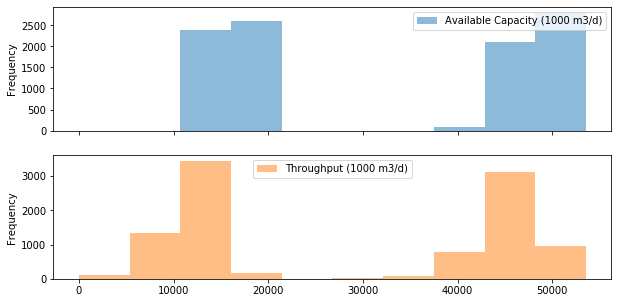

In [59]:
ax = s.plot.hist(subplots= True, alpha=0.5, figsize=(10,5))

## Draw plots using Seaborn

In [60]:
## Set plot sytle

sns.set(style='ticks', context='notebook')

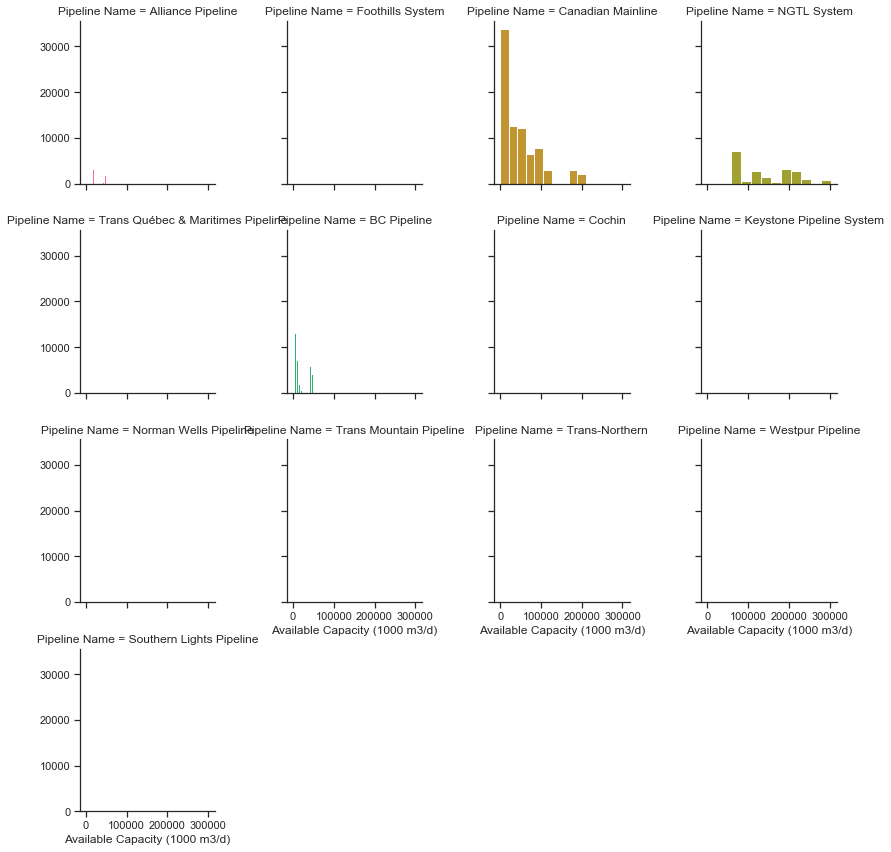

In [61]:
## plot histograms per each pipeline
g = sns.FacetGrid(data=PipelinesThroughputCapacity_df, col='Pipeline Name', col_wrap=4, hue='Pipeline Name')
g.map(plt.hist, 'Available Capacity (1000 m3/d)')

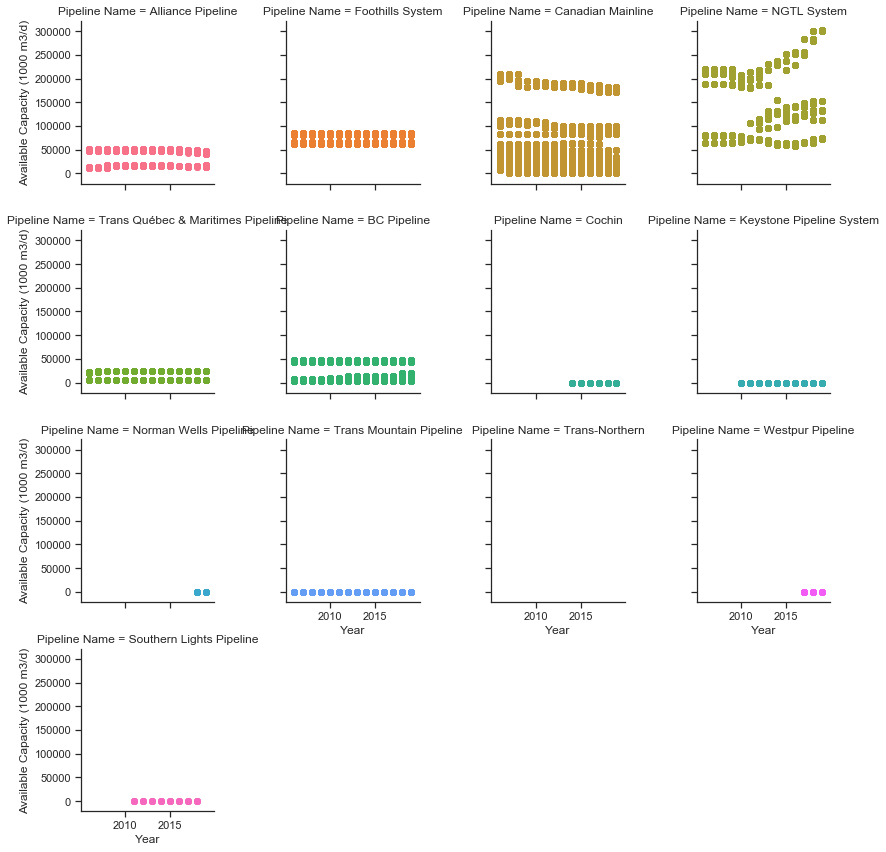

In [62]:
## plot scatter plots for each pipeline
g = sns.FacetGrid(data=PipelinesThroughputCapacity_df, col='Pipeline Name', col_wrap=4, hue='Pipeline Name')
g.map(plt.scatter, 'Year','Available Capacity (1000 m3/d)')

## Export required dataframe to Power BI to create final visuals

In [ ]:
## run condensed script in power bi to import the dataframes.